In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
import missingno as mano
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime, timedelta
from sklearn import preprocessing
import pyodbc
from scipy.stats import normaltest, shapiro, chisquare, kstest

In [51]:
import import_ipynb

In [52]:
import Template as tm

In [53]:
df_churn=tm.load_data('telecom_users.csv','csv')

In [54]:
tm.df_details(df_churn)

Shape:  (5986, 22)
Column types: 
unnamed               int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
H/T?H


,unnamed,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [55]:
df_churn=tm.remove_columns(df_churn,['unnamed','customerID']) #remove the unnamed column and customerID column
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [77]:
tm.missing_count(df_churn) # no missing values apparantly. Let's see if there are any incorrect values

,Missing percentage,Missing sum
gender,0.000000,0
SeniorCitizen,0.000000,0
Partner,0.000000,0
Dependents,0.000000,0
tenure,0.000000,0
PhoneService,0.000000,0
MultipleLines,0.000000,0
InternetService,0.000000,0
OnlineSecurity,0.000000,0
OnlineBackup,0.000000,0


In [58]:
df_churn['TotalCharges'].unique()

array(['1734.65', '3973.2', '2869.85', ..., '306.05', '1200.15', '457.3'],
      dtype=object)

In [59]:
tm.to_numeric(df_churn,['TotalCharges']) # total charges have blank values that is why it can't convert to numeric

KeyError: 'T'

In [69]:
tm.discretize(df_churn,'TotalCharges',' ',np.nan)

0       1734.65
1        3973.2
2       2869.85
3         238.5
4         119.5
         ...   
5981         95
5982     2198.3
5983     306.05
5984    1200.15
5985      457.3
Name: TotalCharges, Length: 5986, dtype: object

In [74]:
tm.to_numeric(df_churn,['TotalCharges'])

0       1734.65
1       3973.20
2       2869.85
3        238.50
4        119.50
         ...   
5981      95.00
5982    2198.30
5983     306.05
5984    1200.15
5985     457.30
Name: TotalCharges, Length: 5986, dtype: float64

In [78]:
tm.missing_count(df_churn) #There are 10 missing values

,Missing percentage,Missing sum
gender,0.000000,0
SeniorCitizen,0.000000,0
Partner,0.000000,0
Dependents,0.000000,0
tenure,0.000000,0
PhoneService,0.000000,0
MultipleLines,0.000000,0
InternetService,0.000000,0
OnlineSecurity,0.000000,0
OnlineBackup,0.000000,0


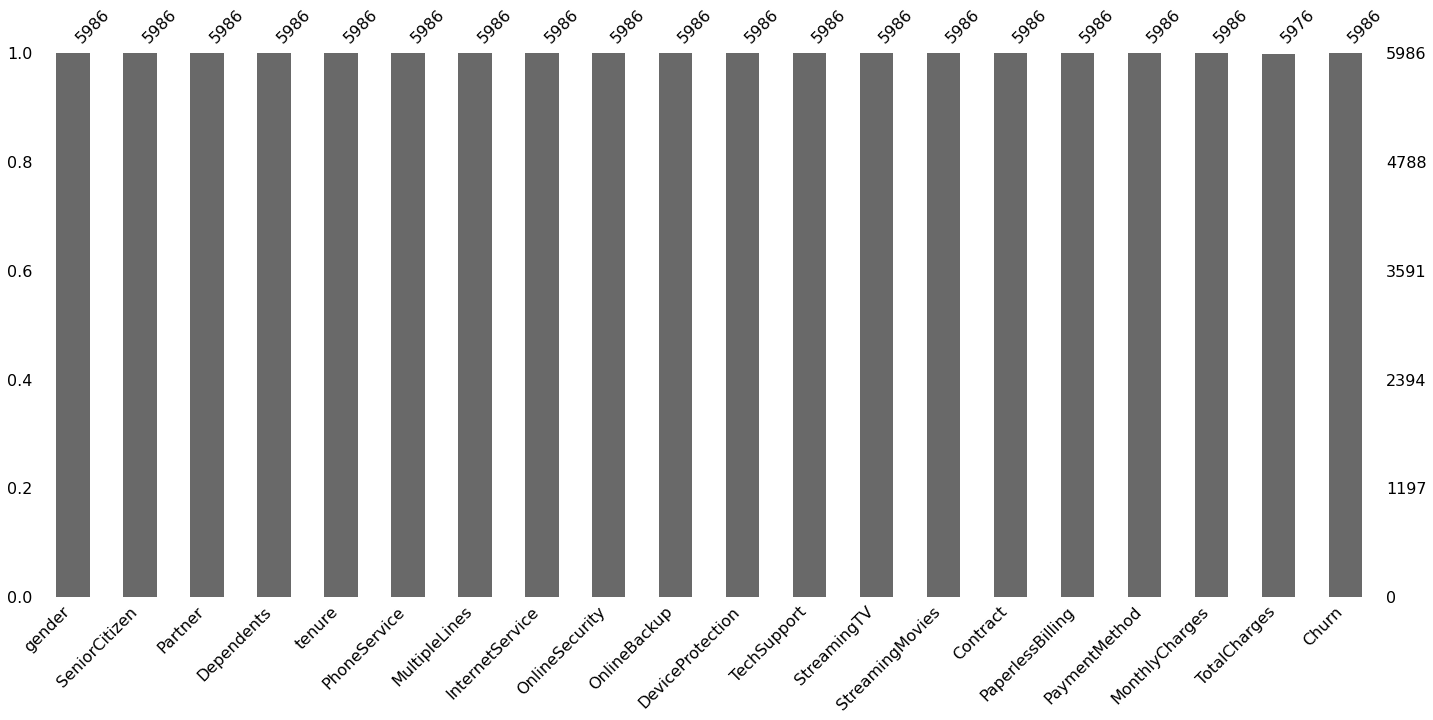

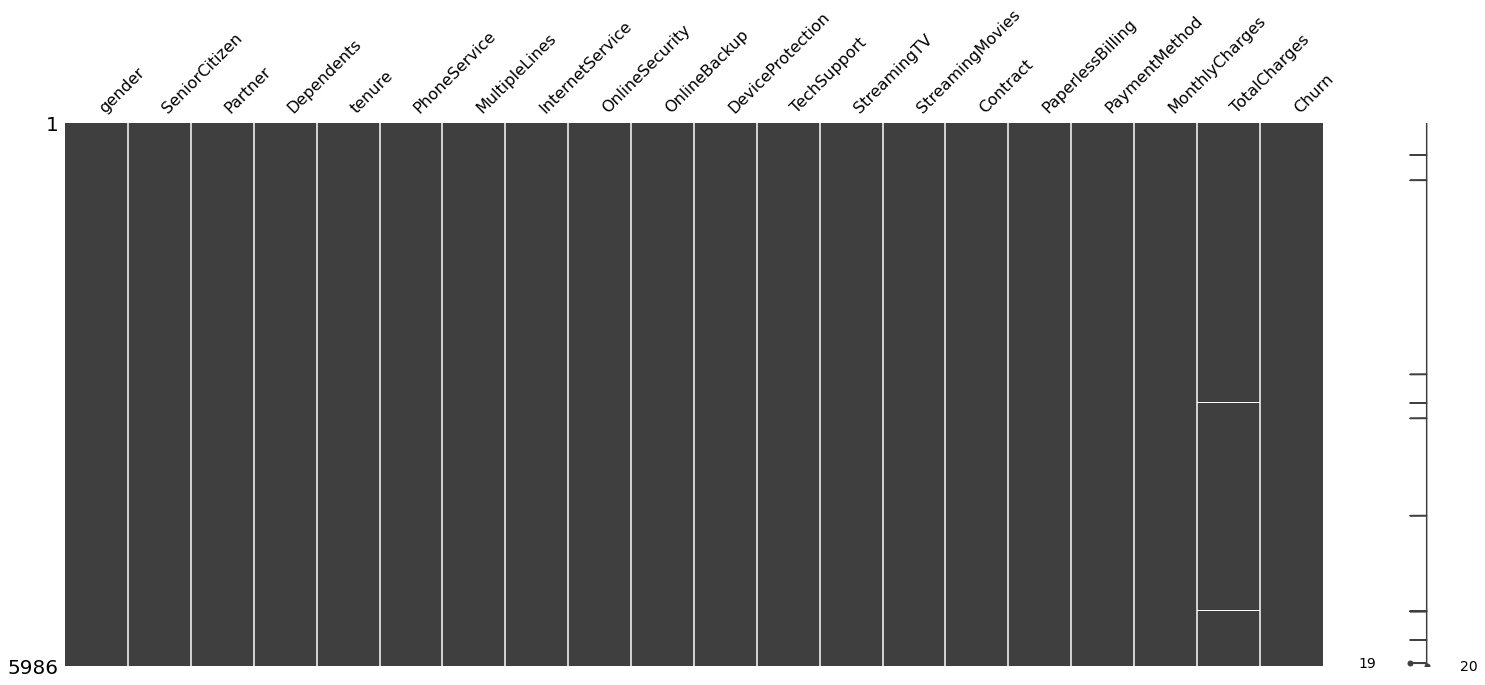

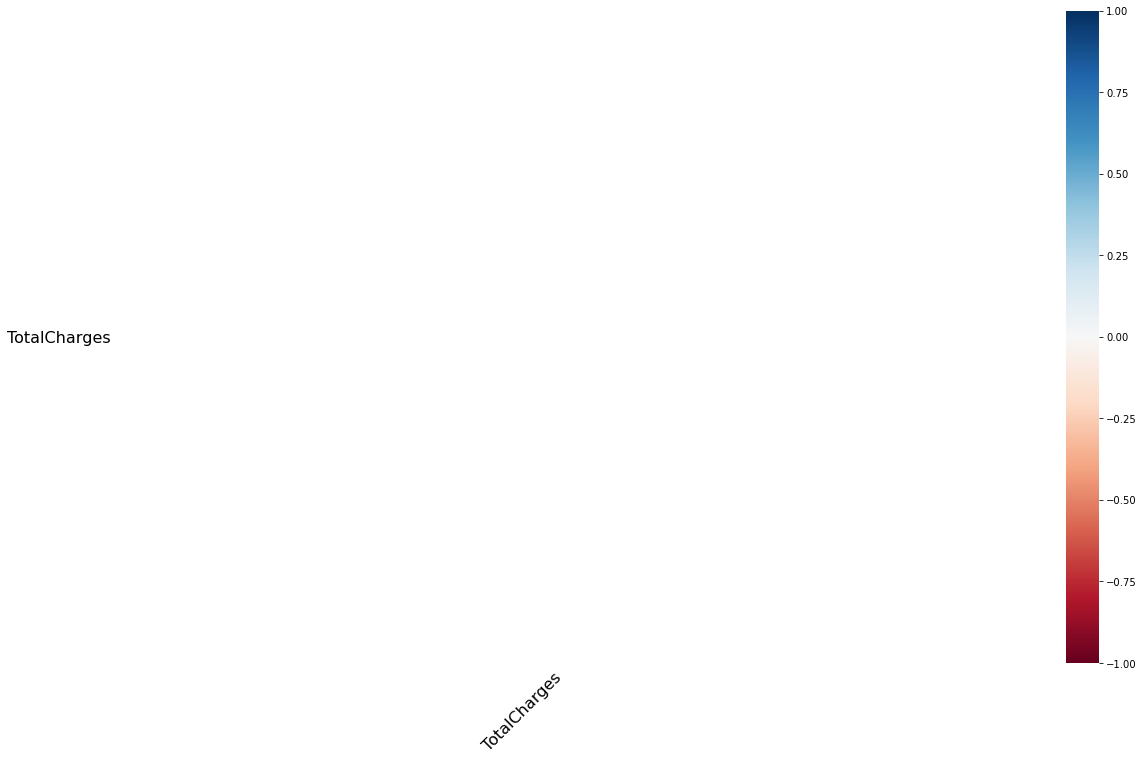

In [75]:
tm.mano_analysis(df_churn)

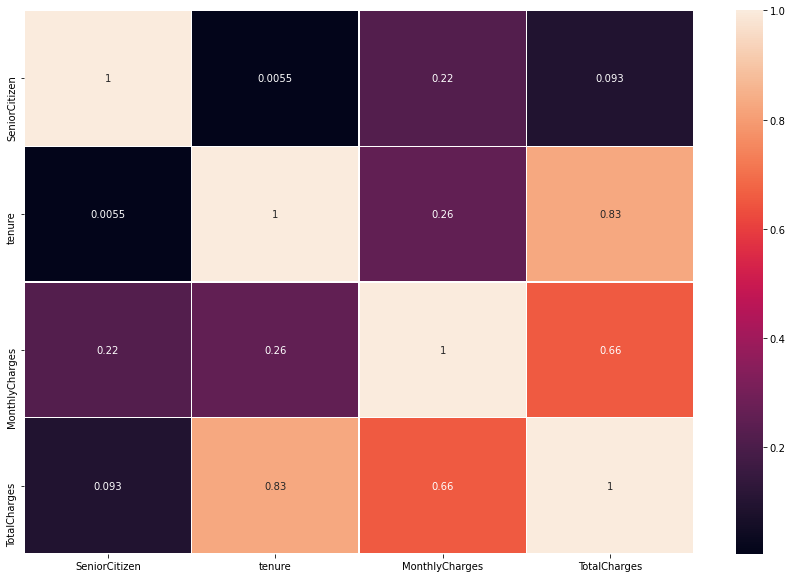

In [76]:
tm.corr_heatmap(df_churn)

How many columns do you want to impute? 3
Enter column: tenure
Enter column: MonthlyCharges
Enter number of neighbors: 3
knn plot column x: MonthlyCharges
knn plot column y: TotalCharges


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


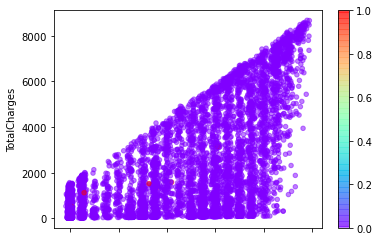

In [82]:
df_churn=tm.fill_mv(df_churn,'TotalCharges','knn')
df_churn #successfully imputed through knn imputation

No     4399
Yes    1587
Name: Churn, dtype: int64


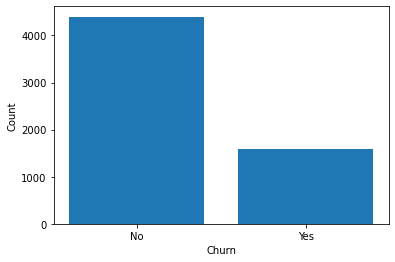

In [83]:
tm.categorical_count(df_churn,'Churn') # There is a class imbalance in this dataset so might want to oversample the data later on
#df_churn['TotalCharges'][0].unique()

In [84]:
df_churn=tm.encode(df_churn,'Churn','label')

C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [49]:
df_churn.corr() 

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.005468,0.219387,0.150097
tenure,0.005468,1.000000,0.256983,-0.348469
MonthlyCharges,0.219387,0.256983,1.000000,0.186753
Churn,0.150097,-0.348469,0.186753,1.000000


In [88]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

cat=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for i in cat:
    data_crosstab = pd.crosstab(df_churn[i], df_churn['Churn'], 
    margins = False) 
    #print(data_crosstab) 
    #print("")

    stat, p, dof, expected = chi2_contingency(data_crosstab)
    #print(expected)
    #print("")

    # interpret p-value
    print(i)
    print('P value: ', p)
    if p<0.05:
        print('Dependent (reject null hypothesis)')
    else:
        print('Independent (accept null hypothesis)')
    print("")

gender
P value:  0.4780481366595716
Independent (accept null hypothesis)

SeniorCitizen
P value:  5.640302823047313e-31
Dependent (reject null hypothesis)

Partner
P value:  9.151167294213974e-30
Dependent (reject null hypothesis)

Dependents
P value:  4.150645452889598e-35
Dependent (reject null hypothesis)

PhoneService
P value:  0.49662979409934027
Independent (accept null hypothesis)

MultipleLines
P value:  0.019144065337666494
Dependent (reject null hypothesis)

InternetService
P value:  3.451874563052055e-130
Dependent (reject null hypothesis)

OnlineSecurity
P value:  3.60686653344072e-156
Dependent (reject null hypothesis)

OnlineBackup
P value:  3.2003444505960775e-109
Dependent (reject null hypothesis)

DeviceProtection
P value:  2.808212905679805e-102
Dependent (reject null hypothesis)

TechSupport
P value:  5.608628974574772e-148
Dependent (reject null hypothesis)

StreamingTV
P value:  1.5756554547823524e-67
Dependent (reject null hypothesis)

StreamingMovies
P value:  8.

In [90]:
df_churn=tm.remove_columns(df_churn,['gender'])
df_churn

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0
1,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,0
2,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1
3,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,0
4,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,1
5982,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0
5983,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0
5984,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,1


count    5986.000000
mean       32.468760
std        24.516391
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

According to skew and kurtosis test: 
Skew =  0.23376356878372992
Kurtosis =  -1.3866756774226625
stat=  65890.02098907482
p=  0.0
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.904808521270752
p=  0.0
Probably not Normal

According to Chi-Squared normality test: 
stat=  110792.79311373856
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  0.8903805062075174
p=  0.0
Probably not Normal


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


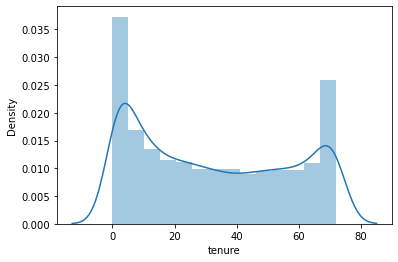

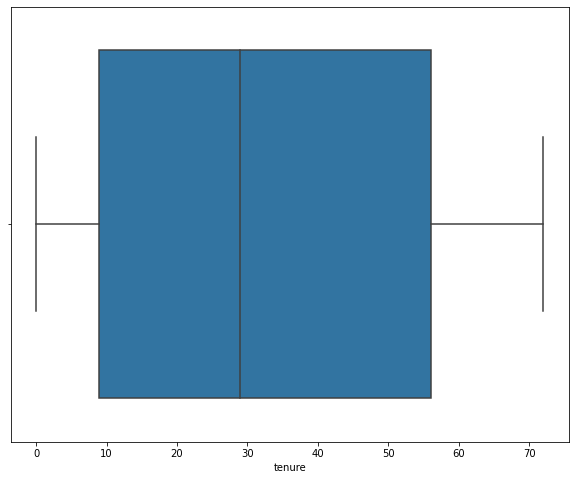

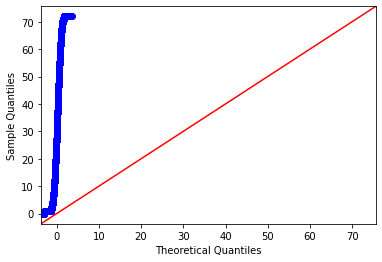

count    5986.000000
mean       64.802213
std        30.114702
min        18.250000
25%        35.650000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

According to skew and kurtosis test: 
Skew =  -0.21862368693019338
Kurtosis =  -1.2596210933839709
stat=  9937.571430101696
p=  0.0
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.9211083054542542
p=  0.0
Probably not Normal

According to Chi-Squared normality test: 
stat=  83758.99224993397
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  1.0
p=  0.0
Probably not Normal


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


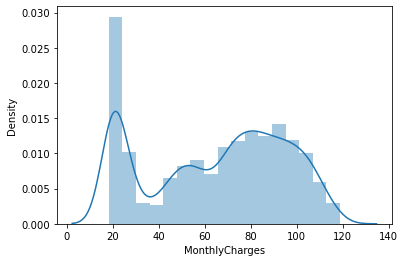

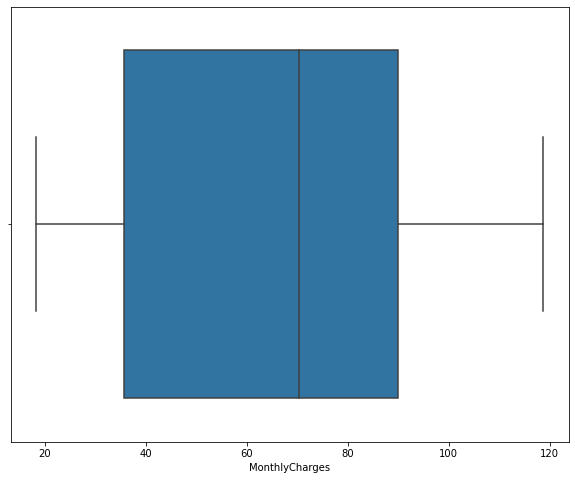

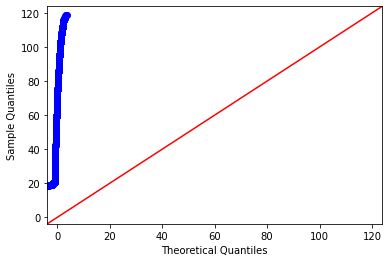

count    5986.000000
mean     2296.148870
std      2272.956428
min        18.800000
25%       404.687500
50%      1411.500000
75%      3841.500000
max      8684.800000
Name: TotalCharges, dtype: float64

According to skew and kurtosis test: 
Skew =  0.9512668203576035
Kurtosis =  -0.26050677909501285
stat=  680.7385697436426
p=  1.5118119393689989e-148
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.8612124919891357
p=  0.0
Probably not Normal

According to Chi-Squared normality test: 
stat=  13466239.483805902
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  1.0
p=  0.0
Probably not Normal


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


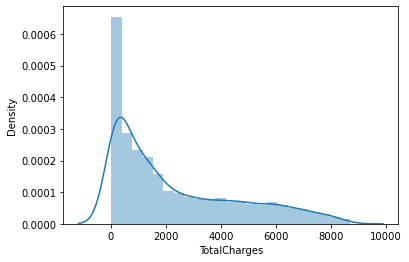

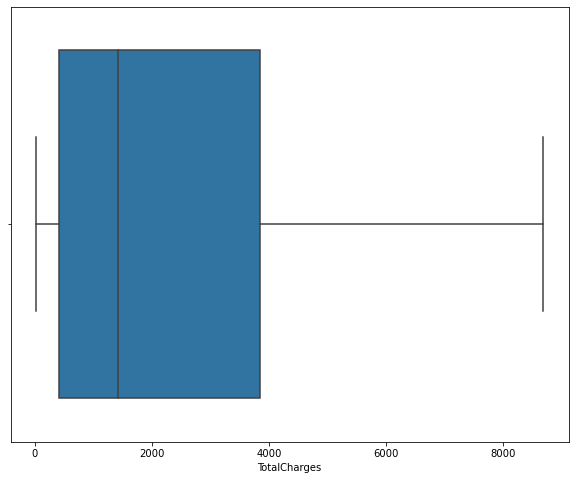

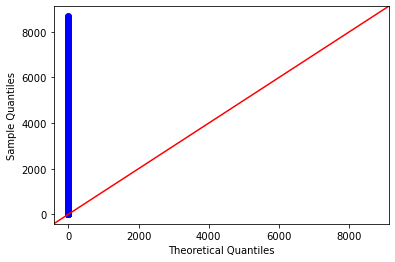

In [92]:
num=['tenure','MonthlyCharges','TotalCharges']
for i in num:
    tm.numerical_analysis(df_churn,i)

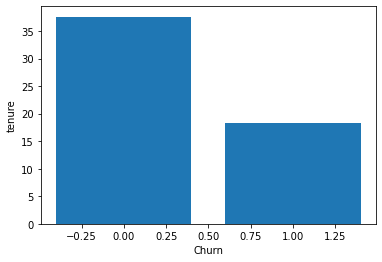

In [93]:
tm.categorical_analysis(df_churn,'Churn','tenure','mean') # chances of churn are less when tenure period is high and vice verca

In [101]:
df_churn_enc=tm.df_copy(df_churn)
df_churn_enc

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0
1,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,0
2,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1
3,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,0
4,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,1
5982,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,0
5983,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0
5984,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,1


In [102]:
column=['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for i in column:
    df_churn_enc[i]=tm.encode(df_churn_enc,i,'label')
df_churn_enc

C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,24.10,1734.65,0
1,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,88.15,3973.20,0
2,1,1,1,38,1,1,1,1,1,1,1,1,1,1,1,1,74.95,2869.85,1
3,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,55.90,238.50,0
4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,95.00,95.00,1
5982,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,91.10,2198.30,0
5983,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,21.15,306.05,0
5984,1,1,1,12,1,1,1,1,1,1,1,1,1,1,1,1,99.45,1200.15,1


Do you want to oversample your training data? (0/1): 0
Enter number of neighbors: 5
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       895
           1       0.58      0.46      0.51       303

    accuracy                           0.78      1198
   macro avg       0.71      0.67      0.69      1198
weighted avg       0.77      0.78      0.77      1198

Accuracy(%): 
77.96327212020033
Precision(%): 
58.09128630705395
F1 score: 
0.5147058823529412
Logistic loss: 
7.611283578962329


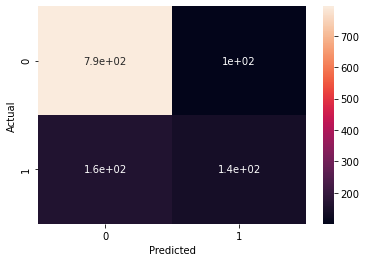

In [104]:
tm.ml(df_churn_enc,'Churn','KNN') #knn without oversampling

Do you want to oversample your training data? (0/1): 1
Enter number of neighbors: 5
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       895
           1       0.51      0.55      0.53       303

    accuracy                           0.75      1198
   macro avg       0.67      0.68      0.68      1198
weighted avg       0.76      0.75      0.75      1198

Accuracy(%): 
75.04173622704508
Precision(%): 
50.60606060606061
F1 score: 
0.5276461295418641
Logistic loss: 
8.620387709899347


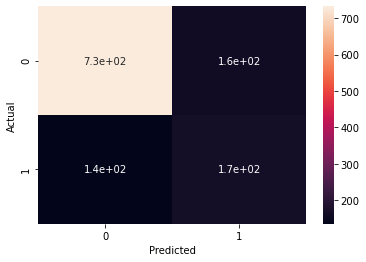

In [105]:
tm.ml(df_churn_enc,'Churn','KNN') #knn with oversampling

What do you want your test size to be? 0.2


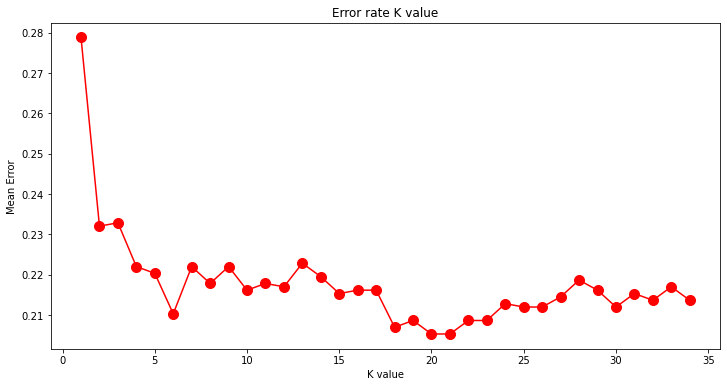

In [107]:
tm.error_rate_plot(df_churn_enc, 'Churn', classification=True, oversample=False)

What do you want your test size to be? 0.2


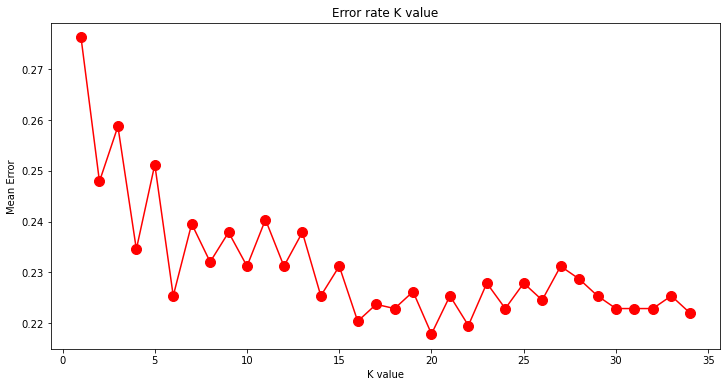

In [108]:
tm.error_rate_plot(df_churn_enc, 'Churn', classification=True, oversample=True)

Do you want to oversample your training data? (0/1): 0
Enter number of neighbors: 20
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       895
           1       0.63      0.46      0.53       303

    accuracy                           0.79      1198
   macro avg       0.73      0.68      0.70      1198
weighted avg       0.78      0.79      0.78      1198

Accuracy(%): 
79.46577629382304
Precision(%): 
62.78026905829597
F1 score: 
0.532319391634981
Logistic loss: 
7.092325008125822


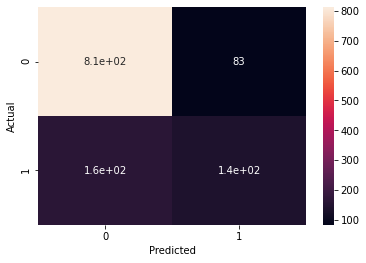

In [109]:
tm.ml(df_churn_enc,'Churn','KNN') #knn without oversampling

Do you want to oversample your training data? (0/1): 1
Enter number of neighbors: 20
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       895
           1       0.57      0.55      0.56       303

    accuracy                           0.78      1198
   macro avg       0.71      0.71      0.71      1198
weighted avg       0.78      0.78      0.78      1198

Accuracy(%): 
78.29716193656094
Precision(%): 
57.43944636678201
F1 score: 
0.5608108108108107
Logistic loss: 
7.4959768056433145


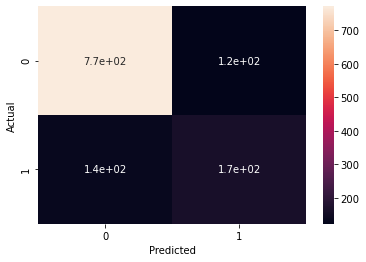

In [110]:
tm.ml(df_churn_enc,'Churn','KNN') #knn with oversampling